## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

In [6]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [7]:
df['timestamp'][0]

'2017-01-21 22:11:48.556739'

In [8]:
df.timestamp.value_counts()

2017-01-21 22:11:48.556739    1
2017-01-14 00:19:20.419940    1
2017-01-10 04:54:54.307909    1
2017-01-04 19:15:59.966448    1
2017-01-10 04:13:56.984483    1
                             ..
2017-01-22 23:52:05.547822    1
2017-01-03 01:52:22.432039    1
2017-01-03 19:38:12.778963    1
2017-01-17 02:21:47.173042    1
2017-01-16 12:40:24.467417    1
Name: timestamp, Length: 294478, dtype: int64

In [9]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [10]:
df.describe().converted

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [11]:
sum(df.duplicated())

0

In [12]:
df.tail(2)

,user_id,timestamp,group,landing_page,converted
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [13]:
df.tail(4).sum()

user_id                                                   3093005
timestamp       2017-01-12 00:51:57.0783722017-01-22 11:45:03....
group                              controlcontrolcontroltreatment
landing_page                     old_pageold_pageold_pagenew_page
converted                                                       0
dtype: object

In [14]:
print(df[(df['landing_page']=='new_page')])
print(len(df[(df['landing_page']=='new_page')]))

        user_id                   timestamp      group landing_page  converted
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
...         ...                         ...        ...          ...        ...
294462   677163  2017-01-03 19:41:51.902148  treatment     new_page          0
294465   925675  2017-01-07 20:38:26.346410  treatment     new_page          0
294468   643562  2017-01-02 19:20:05.460595  treatment     new_page          0
294472   822004  2017-01-04 03:36:46.071379  treatment     new_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[147239 rows x 5 columns]
147239


c. The number of unique users in the dataset.

In [15]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [16]:
(df.converted == 1).mean()

0.11965919355605512

In [17]:
(df == 'new_page').value_counts()

user_id  timestamp  group  landing_page  converted
False    False      False  False         False        147239
                           True          False        147239
dtype: int64

In [18]:
(df == 'new_page').sum()

user_id              0
timestamp            0
group                0
landing_page    147239
converted            0
dtype: int64

In [19]:
(df == 'treatment').value_counts()

user_id  timestamp  group  landing_page  converted
False    False      True   False         False        147276
                    False  False         False        147202
dtype: int64

In [20]:
(df == 'treatment').sum()

user_id              0
timestamp            0
group           147276
landing_page         0
converted            0
dtype: int64

In [21]:
(df.group == 'treatment')

0         False
1         False
2          True
3          True
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477     True
Name: group, Length: 294478, dtype: bool

In [22]:
(df.landing_page == 'new_page')

0         False
1         False
2          True
3          True
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477     True
Name: landing_page, Length: 294478, dtype: bool

In [23]:
((df.group == 'treatment')==(df.landing_page == 'new_page'))==True

0         True
1         True
2         True
3         True
4         True
          ... 
294473    True
294474    True
294475    True
294476    True
294477    True
Length: 294478, dtype: bool

In [24]:
((df.group == 'treatment')==(df.landing_page == 'new_page'))==False

0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Length: 294478, dtype: bool

In [25]:
df[((df.group == 'treatment')==(df.landing_page == 'new_page'))==False].value_counts()

user_id  timestamp                   group      landing_page  converted
630052   2017-01-07 12:25:54.089486  treatment  old_page      1            1
838874   2017-01-11 03:27:16.644634  control    new_page      0            1
835782   2017-01-08 12:18:21.247646  treatment  old_page      0            1
835788   2017-01-15 05:10:06.789288  control    new_page      0            1
835802   2017-01-07 17:01:00.638586  treatment  old_page      0            1
                                                                          ..
733739   2017-01-16 13:45:37.051528  treatment  old_page      0            1
733794   2017-01-10 22:44:51.058320  control    new_page      0            1
733888   2017-01-21 00:40:41.792130  treatment  old_page      0            1
733972   2017-01-08 12:13:02.326327  treatment  old_page      0            1
945971   2017-01-22 12:43:54.087275  control    new_page      0            1
Length: 3893, dtype: int64

In [26]:
df[((df.group == 'treatment')==(df.landing_page == 'new_page'))==False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

e. The number of times the `new_page` and `treatment` don't line up.

In [27]:
df[((df.group == 'treatment')==(df.landing_page == 'new_page'))==False].shape[0]

3893

f. Do any of the rows have missing values?

In [28]:
print('##########################isnull()##########################\\n line up is:\\n {}.'.format(df.isnull()))
print('##########################isnull().sum()##########################\\n line up is:\\n {}.'.format(df.isnull().sum()))
print('##########################any()##########################\\n line up is:\\n {}.'.format(df.any()))
print('##########################values##########################\\n line up is:\\n {}.'.format(df.values))
print('##########################values.any()##########################\\n line up is:\\n {}.'.format(df.values.any()))
print('##########################isnull().values.any()##########################\\n line up is:\\n {}.'.format(df.isnull().values.any()))

##########################isnull()##########################\n line up is:\n         user_id  timestamp  group  landing_page  converted
0         False      False  False         False      False
1         False      False  False         False      False
2         False      False  False         False      False
3         False      False  False         False      False
4         False      False  False         False      False
...         ...        ...    ...           ...        ...
294473    False      False  False         False      False
294474    False      False  False         False      False
294475    False      False  False         False      False
294476    False      False  False         False      False
294477    False      False  False         False      False

[294478 rows x 5 columns].
##########################isnull().sum()##########################\n line up is:\n user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [29]:
# Remove not_aligned rows, and store the result in a new dataframe df2
not_aligned_rows=df[((df.group == 'treatment') == (df.landing_page == 'new_page')) == False].index
df2=df.drop(not_aligned_rows,axis=0)

In [30]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [31]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [32]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [33]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [34]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [35]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical.
df2.drop(df2[df2.user_id.duplicated()].index,inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [36]:
probability = (df2.converted == 1).mean()
probability

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [37]:
print(df2.shape[0])
print((df2.converted == 1).sum())
print((df2.group == 'control').sum())
control_converted =(df2[df2.group == 'control'].converted == 1).mean()
control_converted

290584
34753
145274


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [38]:
treatment_converted = (df2[df2.group == 'treatment'].converted == 1).mean()
print(treatment_converted)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [39]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [40]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>Since the probability of converting regardless of the page is 11.97%, the probability of converting given an individual received control page is 12.04%, the probability of converting given an individual received treatment page is 11.88%, the probability of receiving the new page is 50.01%, the difference in conversion rates is 0.16%, Then we can't say for sure that the new treatment page gets more conversions than the old control page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- Null hypotheses: H0: p_old − p_new ≥ 0

- Alternative hypotheses: H1: p_old − p_new < 0
>Recall that you just calculated that the "converted" probability (or rate) for the old page is slightly higher than that of the new page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [41]:
p_new= (df2.converted == 1).mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [42]:
p_old= (df2.converted == 1).mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [43]:
n_new= (df2.group == 'treatment').sum()
print(n_new)
n_new = df2[df2.landing_page == 'new_page'].shape[0]
print(n_new)

145310
145310


d. What is $n_{old}$?

In [44]:
n_old= (df2.group == 'control').sum()
print(n_old)
n_old = df2[df2.landing_page == 'old_page'].shape[0]
print(n_old)

145274
145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [45]:
# Simulate a Sample for the treatment Group
full_p= 1
new_page_converted= (np.random.choice([0,1],size=n_new,p=[full_p-p_new,p_new]))
new_page_converted.mean()

0.1186635468997316

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [46]:
# Simulate a Sample for the control Group
old_page_converted= (np.random.choice([0,1],size=n_old,p=[full_p-p_old,p_old]))
old_page_converted.mean()

0.11920921844239162

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [47]:
p_new.mean()-p_old.mean()

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [48]:
# Sampling distribution 
p_diffs = []
for x in range(10000):
    new_page_converted= (np.random.choice([0,1],size=n_new,p=[full_p-p_new,p_new]))
    old_page_converted= (np.random.choice([0,1],size=n_old,p=[full_p-p_old,p_old]))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
print(x)
    

9999


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [49]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
observation_diff = treatment_converted - control_converted
observation_diff

-0.0015782389853555567

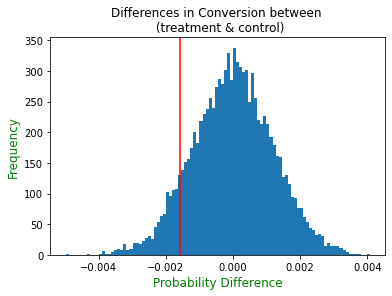

In [50]:
p_diffs = np.asarray(p_diffs)
plt.hist(p_diffs,100)
plt.title("Differences in Conversion between \n (treatment & control)", fontsize=12,color='black')
plt.xlabel("Probability Difference", fontsize=12 ,color='g')
plt.ylabel("Frequency", fontsize=12 ,color='g')
plt.axvline(observation_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [51]:
(p_diffs >= observation_diff).mean()

0.9035

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true when pval > α ⇒ Fail to Reject  H0
* While the p-value is large 0.9 >0.05, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null..

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [52]:
import statsmodels.api as sm

In [53]:
# number of conversions with the old_page
#convert_old = df2.query('group == "control" & converted == 1').converted.count()
#convert_old = df2.query('group == "control" & converted == 1').converted.shape[0]
convert_old = df2.query('(group == "control") and (converted == 1)').shape[0]
#convert_old = df2.query('(group == "control") and (converted == 1)').count()3
#convert_old = len(df2.query('group == "control" & converted == 1'))
# number of conversions with the new_page
#convert_new = df2.query('group == "treatment" & converted == 1').converted.count()
#convert_new = df2.query('group == "treatment" & converted == 1').converted.shape[0]
convert_new = df2.query('(group == "treatment") & (converted == 1)').shape[0]
#convert_new = len(df2.query('group == "treatment" & converted == 1'))
# number of individuals who were shown the old_page
#n_old = df2.query('group == "control"').shape[0]
n_old = len(df2.query('group == "control"'))
# number of individuals who received new_page
#n_new = df2.query('group == "treatment"').shape[0]
n_new = len(df2.query('group == "treatment"'))
convert_old ,convert_new ,n_old ,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [54]:
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
ztest, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
ztest, p_value

(-1.3109241984234394, 0.9050583127590245)

In [55]:
norm.cdf(ztest)

0.09494168724097551

In [56]:
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The p-value is 0.9052 which is so much larger than 0.05. Also, the Z-Score is smaller than the Critical Z-Score, so we can't reject the null hypothesis. There is no evidence to reject the null hypothesis. The conclusion is that the conversion rates of the new page are not larger than that of the old page. The difference between p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
df2[['ab_page','ab_page2']]=pd.get_dummies(df2['landing_page'])
df2=df2.drop('ab_page2',axis=1)
df2['intercept']=1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [58]:
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

In [59]:
results = log_mod.fit();

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:               8.077e-06
Time:                        22:03:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> The p-value associated with ab_page is 0.1899. The null cannot be rejected because 0.1899 is more than Type I error 0.05. Due to the negative coefficient of ab_page, we can't tell the new page gets more conversion rate. So we should keep the old page because the new page did't prove to have higher conversions. The logistic regression illustrates that the new page has no effect on conversion rate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>We could take into consideration the timestamp column to determine the time that is likely to get more conversions. The disadvantage to adding additional terms into the regression model is that the more metrics are evaluated,it is likely get differences which we can't make sure for what reason.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [61]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [62]:
# Join with the df2 dataframe
df_merged = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [63]:
### Create the necessary dummy variables
dum_country = pd.get_dummies(df_merged['country'])
df_w_country = dum_country.join(df_merged, how='inner')
df_w_country.drop('UK', axis = 1, inplace=True)
df_w_country.head()

,CA,US,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,,,
834778,0,0,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,0,1,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,0,0,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,0,0,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,0,0,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [64]:
log_mod1 = sm.Logit(df_w_country.converted, df_w_country[['intercept', 'US' , 'CA']])
results = log_mod1.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2023-02-23 22:03 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.
Tip: Conclusions should include both statistical reasoning, and practical reasoning for the situation.

In [65]:
### Fit Your Linear Model And Obtain the Results
US=df_w_country.query('US == "1"').converted.mean()
CA=df_w_country.query('CA == "1"').converted.mean()
US,CA

(nan, nan)

In [66]:
df_w_country['US_ab_page'] = df_w_country.US * df_w_country.ab_page
df_w_country['CA_ab_page'] = df_w_country.CA * df_w_country.ab_page

In [67]:
log_mod2 = sm.Logit(df_w_country.converted, df_w_country[['intercept', 'ab_page', 'US' , 'CA', 'US_ab_page', 'CA_ab_page']])
results = log_mod2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2023-02-23 22:03 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

>The conversion rate of the new page is not larger than the old page. I fail to reject the null hypothesis. From the regression above we see that the p-value is higher in US than in Canada, which means that in the US it is more likely to have higher convertion rate, but still there isn't enough evidence to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.